In [1]:
#Working with series
import pandas as pd

data = [25, 30, 35, 40, 45]
s = pd.Series(data, index=['A', 'B', 'C', 'D', 'E'])
print(s)

print(s.head(3))

print("Mean:", s.mean())
print("Median:", s.median())
print("Std Dev:", s.std())

A    25
B    30
C    35
D    40
E    45
dtype: int64
A    25
B    30
C    35
dtype: int64
Mean: 35.0
Median: 35.0
Std Dev: 7.905694150420948


In [2]:
# Creating and inspecting dfs
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Carol", "David", "Eve"],
    "Age": [20, 22, 19, 21, 20],
    "Gender": ["Female", "Male", "Female", "Male", "Female"],
    "Marks": [85, 78, 92, 74, 88]
})

print(df.head(2))

print("Columns:", df.columns)
print("Data types:\n", df.dtypes)
print("Summary:\n", df.describe())

df["Passed"] = df["Marks"] >= 80
print(df)

    Name  Age  Gender  Marks
0  Alice   20  Female     85
1    Bob   22    Male     78
Columns: Index(['Name', 'Age', 'Gender', 'Marks'], dtype='object')
Data types:
 Name      object
Age        int64
Gender    object
Marks      int64
dtype: object
Summary:
              Age      Marks
count   5.000000   5.000000
mean   20.400000  83.400000
std     1.140175   7.334848
min    19.000000  74.000000
25%    20.000000  78.000000
50%    20.000000  85.000000
75%    21.000000  88.000000
max    22.000000  92.000000
    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
1    Bob   22    Male     78   False
2  Carol   19  Female     92    True
3  David   21    Male     74   False
4    Eve   20  Female     88    True


In [3]:
# Data selections and filtering 
print(df[["Name", "Marks"]])
print(df[df["Marks"] > 80])

print(df[df["Marks"] == df["Marks"].max()])

    Name  Marks
0  Alice     85
1    Bob     78
2  Carol     92
3  David     74
4    Eve     88
    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
2  Carol   19  Female     92    True
4    Eve   20  Female     88    True
    Name  Age  Gender  Marks  Passed
2  Carol   19  Female     92    True


In [4]:
# Handling missing data
df.loc[1, 'Marks'] = None
df.loc[4, 'Age'] = None
print("Missing values:\n", df.isnull())
df["Marks"] = df["Marks"].fillna(df["Marks"].mean())
df.dropna(subset=["Age"], inplace=True)
print(df)

Missing values:
     Name    Age  Gender  Marks  Passed
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


In [5]:
# Grouping and aggr
print(df.groupby("Gender")[["Age", "Marks"]].mean())

print(df["Gender"].value_counts())

         Age   Marks
Gender              
Female  19.5  88.500
Male    21.5  79.375
Gender
Female    2
Male      2
Name: count, dtype: int64


In [6]:
# Reading and writing data 
df.to_csv("students_data.csv", index=False)

df_new = pd.read_csv("students_data.csv")

print(df_new.head())

    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


             Age      Marks
count   4.000000   4.000000
mean   20.500000  83.937500
std     1.290994   7.428478
min    19.000000  74.000000
25%    19.750000  82.062500
50%    20.500000  84.875000
75%    21.250000  86.750000
max    22.000000  92.000000
Name      0
Age       0
Gender    0
Marks     0
Passed    0
dtype: int64


c:\Users\DELL\.jupyter\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


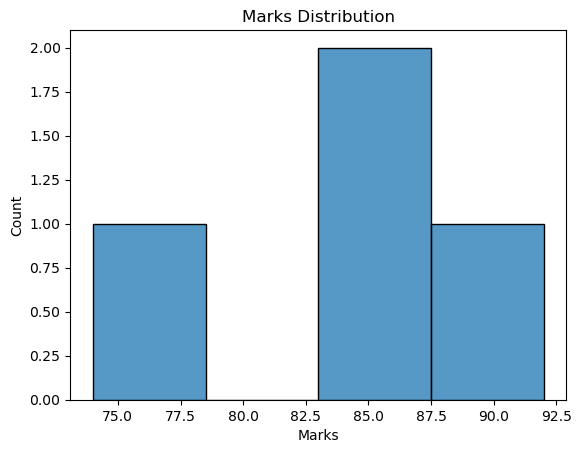

In [7]:
# General EDA with any DataSet
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample dataset (replace with your downloaded CSV)
df = pd.read_csv("students_data.csv")

print(df.describe())
print(df.isnull().sum())

sns.histplot(df["Marks"])
plt.title("Marks Distribution")
plt.show()